In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Loading The Dataset
data = pd.read_csv("C:/Users/Admin/Downloads/ToyotaCorolla.csv")
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
#check for missing values
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [4]:
#Taking the Relevent Column from Dataset
data1 = data[[ "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
data1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


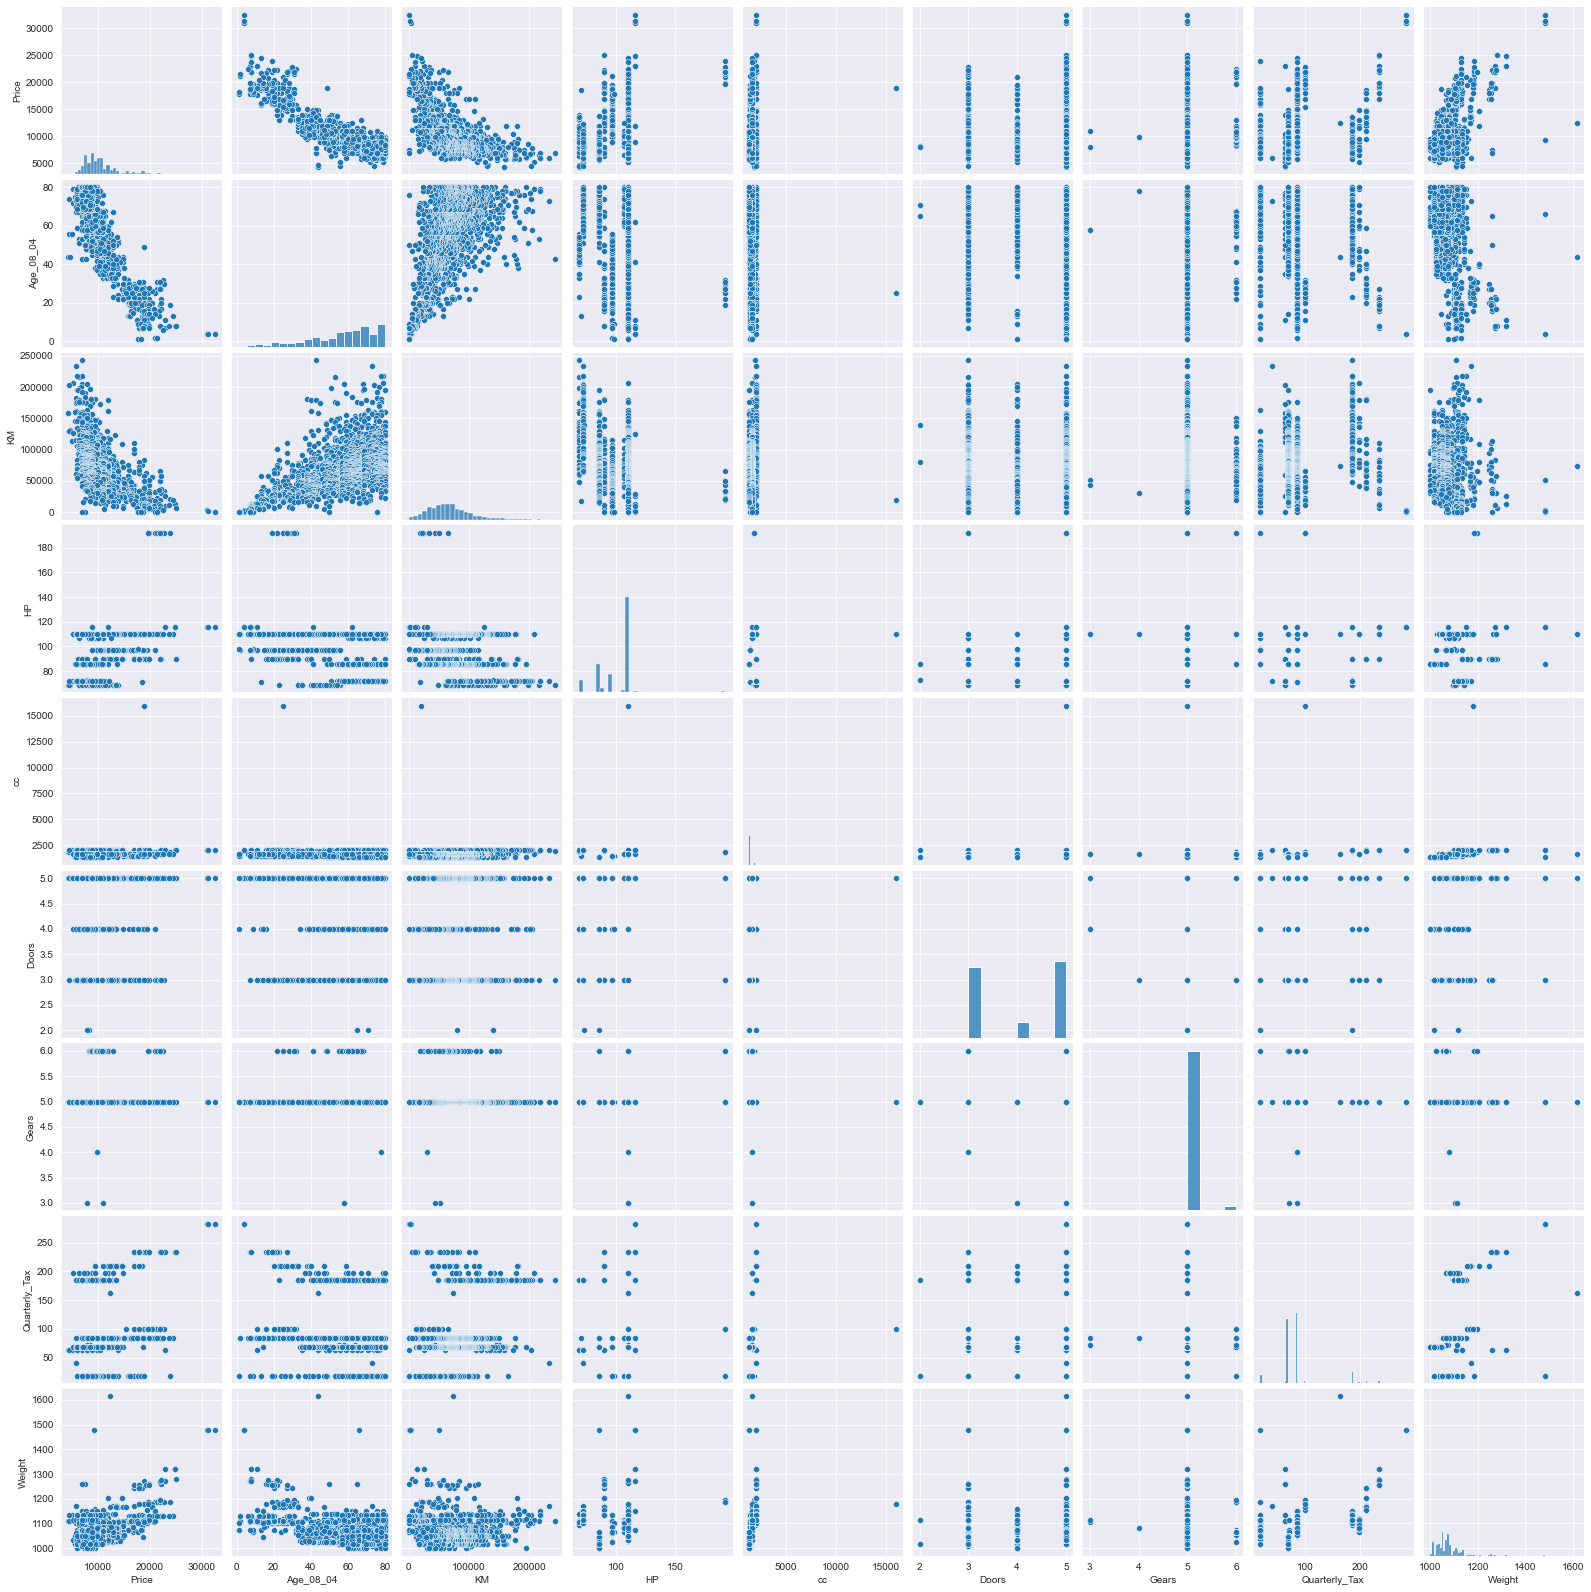

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [7]:
#Build the model --1st Model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit()

In [8]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 P_values is:  
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [ ]:
# Hypothesis Test of SLR model
α = 0.05  # Standard

if model.pvalues[1] < α:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and B1(Age_08_04) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and B1(Age_08_04) is Insignificant in Predicting")

if model.pvalues[2] < α:
    print("p_value is:",model.pvalues[2],", Reject H0,Slope is not Zero and B2(KM) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[2],", Fail to Reject H0,Slope is Zero and B2(KM) is Insignificant in Predicting")

if model.pvalues[3] < α:
    print("p_value is:",model.pvalues[3],", Reject H0,Slope is not Zero and B3(HP) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[3],", Fail to Reject H0,Slope is Zero and B3(HP) is Insignificant in Predicting")

if model.pvalues[4] < α:
    print("p_value is:",model.pvalues[4],", Reject H0,Slope is not Zero and B4(cc) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[4],", Fail to Reject H0,Slope is Zero and B4(cc) is Insignificant in Predicting")
    
    
if model.pvalues[5] < α:
    print("p_value is:",model.pvalues[5],", Reject H0,Slope is not Zero and B5(Doors) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[5],", Fail to Reject H0,Slope is Zero and B5(Doors) is Insignificant in Predicting")

if model.pvalues[6] < α:
    print("p_value is:",model.pvalues[6],", Reject H0,Slope is not Zero and B6(Gears) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[6],", Fail to Reject H0,Slope is Zero and B6(Gears) is Insignificant in Predicting")
    
if model.pvalues[7] < α:
    print("p_value is:",model.pvalues[7],", Reject H0,Slope is not Zero and B7(Quarterly_Tax) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[7],", Fail to Reject H0,Slope is Zero and B7(Quarterly_Tax) is Insignificant in Predicting")


if model.pvalues[8] < α:
    print("p_value is:",model.pvalues[8],", Reject H0,Slope is not Zero and B8(Weight) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[8],", Fail to Reject H0,Slope is Zero and B8(Weight) is Insignificant in Predicting")

In [11]:
#First model R_square
First_model_R2=(model.rsquared,model.rsquared_adj)
First_model_R2

(0.8637627463428192, 0.8629989775766963)

In [14]:
# Dropping door and cc column since they are insignificant
data2=data1.drop(["Doors","cc"],axis=1)
data2

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,5,69,1025
1432,10845,72,19000,86,5,69,1015
1433,8500,71,17016,86,5,69,1015
1434,7250,70,16916,86,5,69,1015


## 2nd Model

In [15]:
## Build the model-- 2nd model

import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=data2).fit()

In [16]:
Second_model_R2=(model.rsquared,model.rsquared_adj)

In [17]:
#Checking Adj_R2 After Dropping Doors & cc columns
if First_model_R2[1]<Second_model_R2[1]:
    print("2nd Model is Better as its AjR2",Second_model_R2[1],"is more then",First_model_R2[1])
else:
    print("1st Model is Better as its AjR2",First_model_R2[1],"is more then",Second_model_R2[1])

2nd Model is Better as its AjR2 0.8630174531381534 is more then 0.8629989775766963


### VIF(Variable inflation Factor) -- Using this method to confirm Collinearity if it is still there or not.
Checking all Y(input) Variable one by one regressing them with Eachother

Industry Standard ≤ 20 for VIF Value

In [19]:
rsq_Age = smf.ols('Age_08_04~KM+HP+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared  
vif_Age = 1/(1-rsq_Age) 

rsq_KM = smf.ols('KM~Age_08_04+HP+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~Age_08_04+KM+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+Quarterly_Tax+Weight',data=data2).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+Gears+Weight',data=data2).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax) 

rsq_Weight = smf.ols('Weight~Age_08_04+KM+HP+Gears+Quarterly_Tax',data=data2).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.884335
1,KM,1.746492
2,HP,1.400460
3,Gears,1.058932
4,Quarterly_Tax,2.263600
5,Weight,2.297072


## since VIF is not more than 20 there is no collineraity effect

### Model Validation Techniques -- 3 Technique

#### Test for Normality of Residuals (Q-Q Plot) -- 1st Technique

Datapoints must be inside Solid red Line or inside the 95% CI

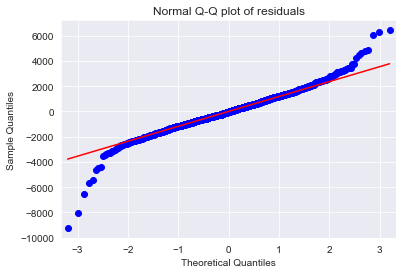

In [20]:
#Building the QQ Plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
#Getting a List of Outliers
list(np.where(model.resid>3000))

[array([  16,   52,   62,   74,   91,  109,  110,  111,  115,  125,  141,
         147,  154,  161,  171,  179,  523,  557,  796, 1054, 1058, 1079,
        1402], dtype=int64)]

Inference: The Given Array is the Outlier if Residual >3000

#### Residual Plot for Homoscedasticity (Fitted VS Residuals, (Ei vsY^) ) --2nd Technique

In [22]:
#Defining a Function For Standardization Value.
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

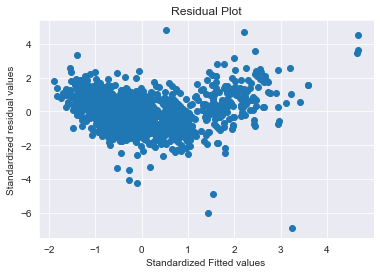

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

##### Inference: Datapoint are dense but No Clear Pattern

#### Residual Vs Regressors -- 3rd Technique (Ei vs Xi)

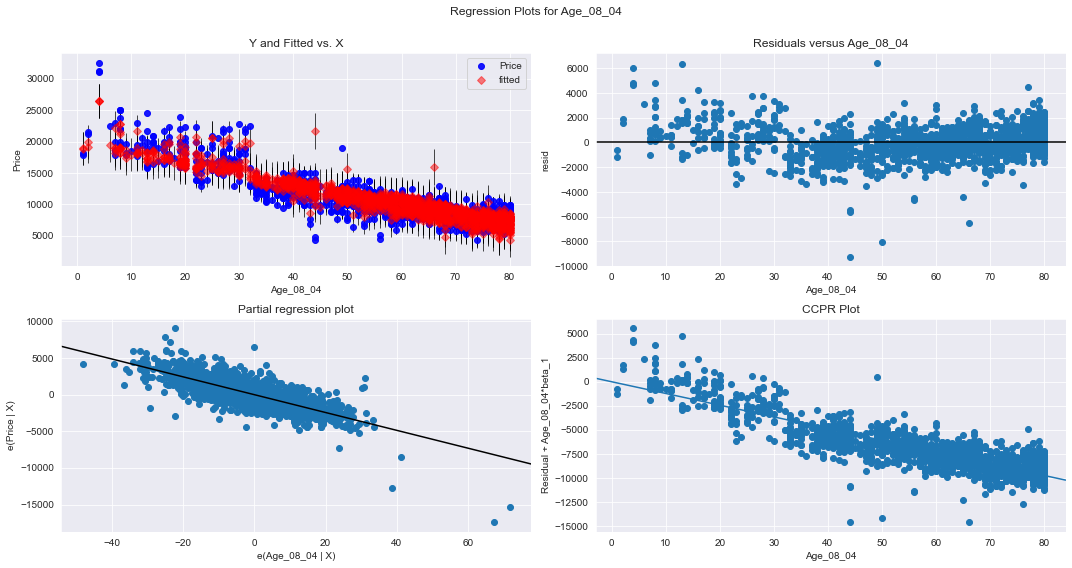

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

### CCPR Plot have slope for Age which means it is significant

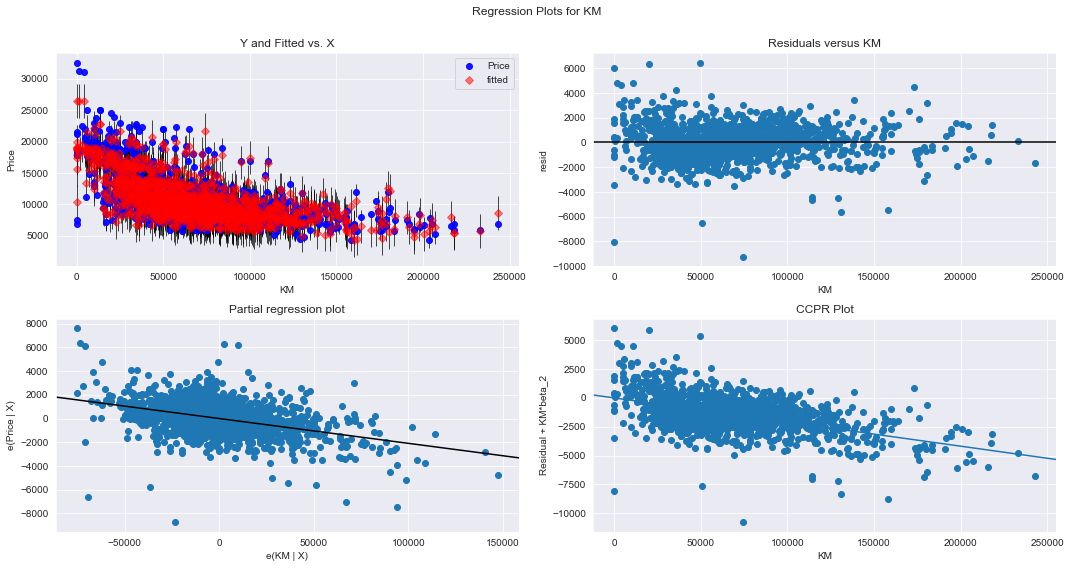

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

### CCPR Plot have slope for KM which means it is significant

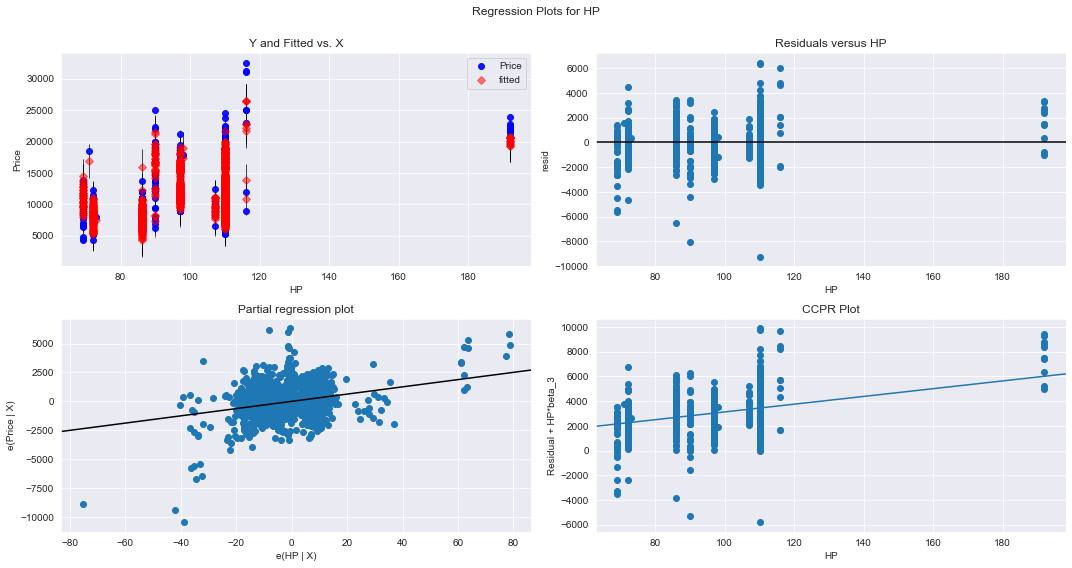

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

### CCPR Plot have slope for HP which means it is significant

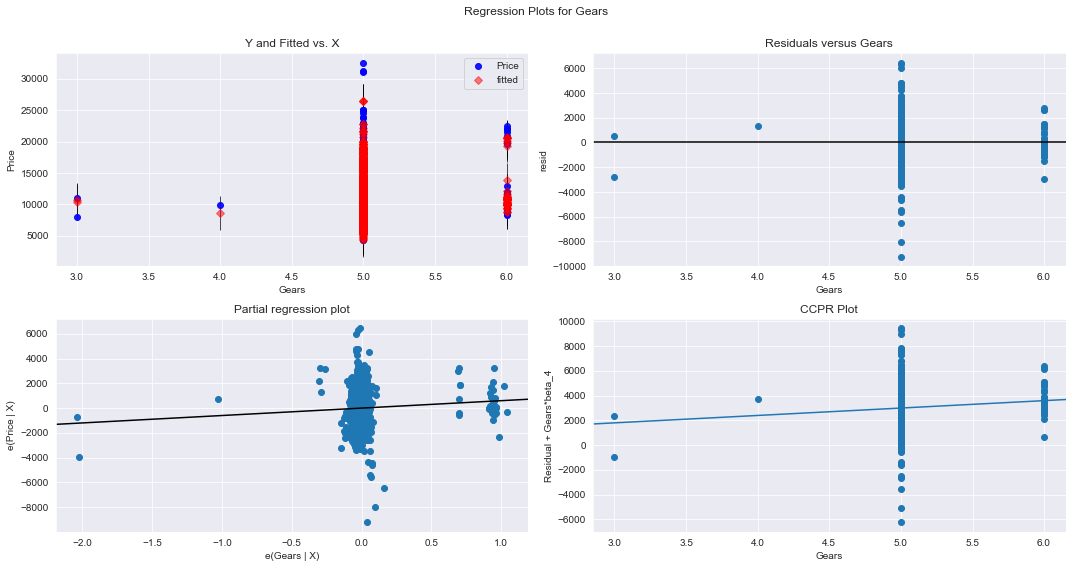

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

### CCPR Plot have slope for Gears which means it is significant

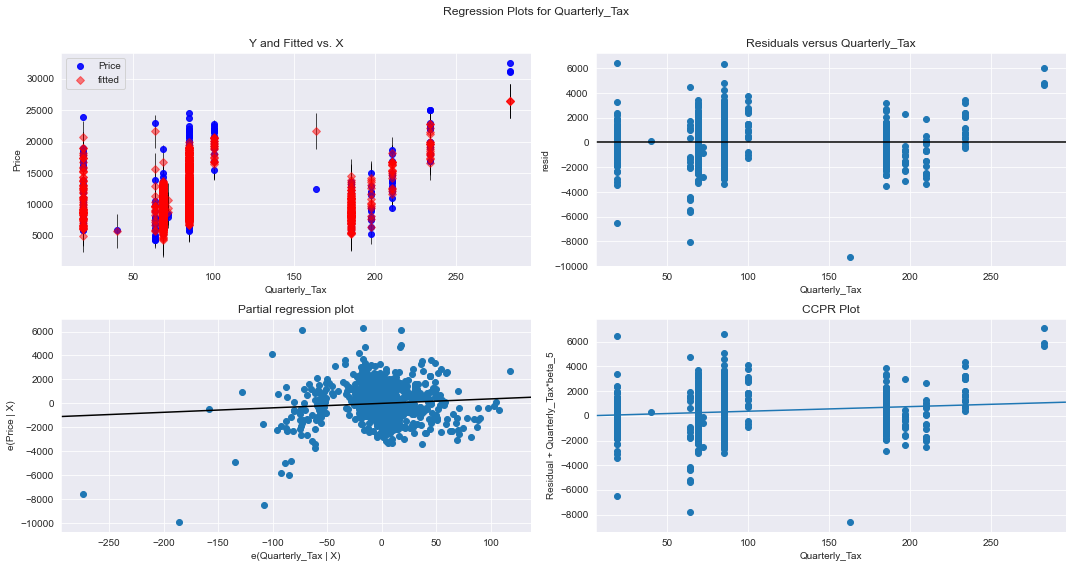

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

### CCPR Plot have slope for Quarterly Tax which means it is significant

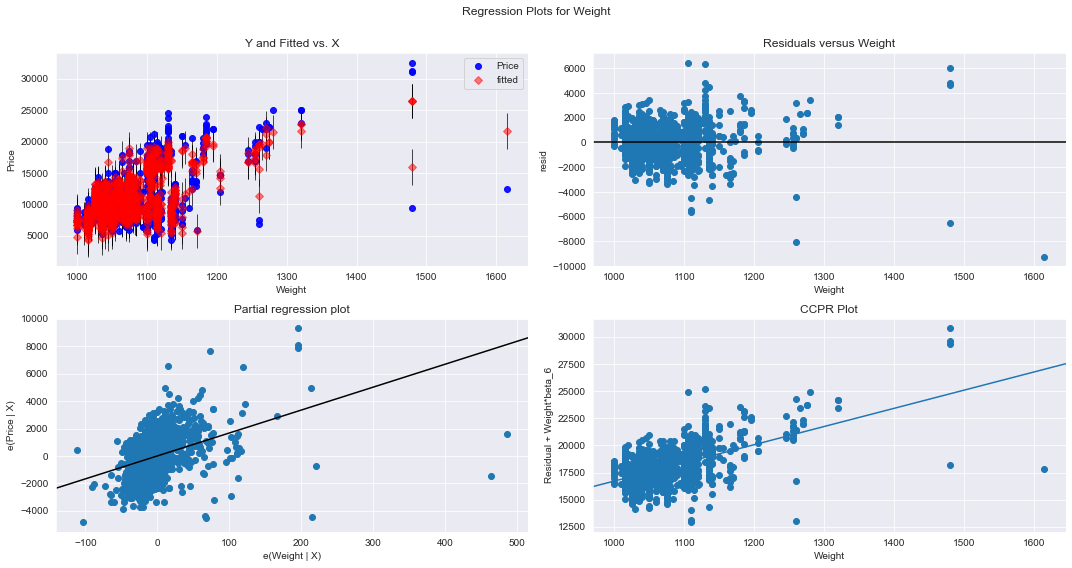

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

### CCPR Plot have slope for Weight which means it is significant

#### Model Deletion Diagnostics-- (Detecting Influencers/Outliers) -- Two methods

#### Cook’s Distance -- 1st Method (First Implementation)

In [30]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
t = model_influence.cooks_distance[0]  

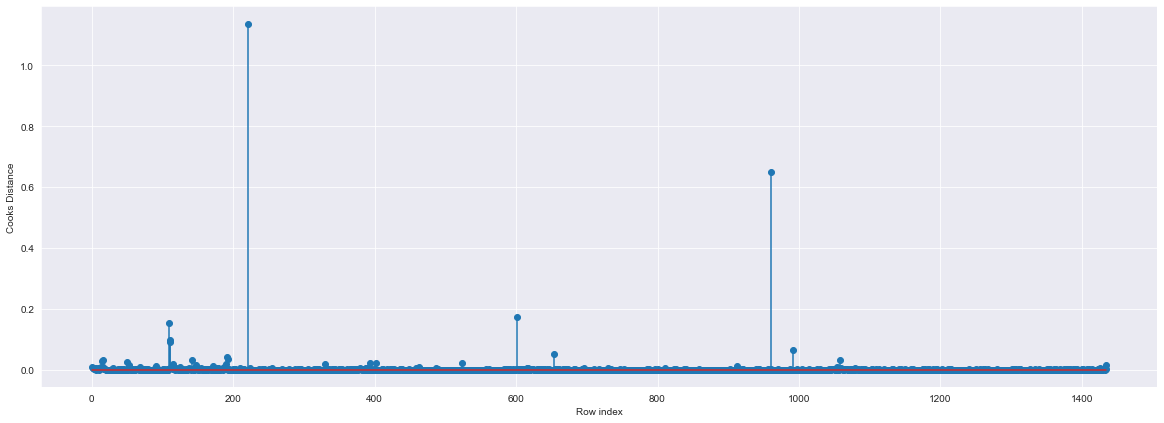

In [32]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
#index and value of influencer where c is more than .5
(np.argmax(t),np.max(t))

(221, 1.136547382319848)

### cook distance gives 221 index datapoint as the potential outliers but, let get some more no of outliers using Leverage method.

#### High Influence points-- 2nd Method (1st implementation)

After the influence Points is the outlier

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [36]:
# 3*((k + 1)/n) -- Formula to determine Influnce / Leverage point
k = data2.shape[1]   # K = no of rows
n = data2.shape[0]   # n = no of columns
leverage = 3*((k + 1)/n)

leverage 

0.016713091922005572

####  After 0.016 any Datapoint is a outlier, so datapoint with index 601,960,991,956 are potential outliers 

#### Comparing the Extreme Observations (Outlier) with Other records in the dataset

In [38]:
# Getting the Values of observation From Cook and Hat Method
data2[data2.index.isin([221,601,960,991,956])]

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
221,12450,44,74172,110,5,163,1615
601,7500,50,1,90,5,64,1260
956,10950,58,51421,110,3,85,1105
960,9390,66,50806,86,5,19,1480
991,7950,58,43000,110,3,72,1114


###  As We can see observation are Extreme, as compared to other record in the Dataset.

#### Improving the model --Deleting the outlier point

In [39]:
data2.head()

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170


In [40]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data3=data2.drop(data2.index[[221,601,956,960,991]],axis=0).reset_index()

In [41]:
data3.head()

,index,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,5,210,1165
1,1,13750,23,72937,90,5,210,1165
2,2,13950,24,41711,90,5,210,1165
3,3,14950,26,48000,90,5,210,1165
4,4,13750,30,38500,90,5,210,1170


In [43]:
#Build the model --3rd Model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=data3).fit()

In [44]:
#3rd Model R_square.
Third_model_R2 = (model.rsquared,model.rsquared_adj)
Third_model_R2

(0.8778896214222306, 0.8773751114001332)

In [45]:
#Checking R2 of 2nd and 3rd Model to find out which model is better
if Second_model_R2[0]<Third_model_R2[0]:
    print("3rd Model is Better as its R2",Third_model_R2[0],"is more then",Second_model_R2[0])
else:
    print("2nd Model is Better as its R2",Second_model_R2[0],"is more then",Third_model_R2[0])

3rd Model is Better as its R2 0.8778896214222306 is more then 0.8635902024630112


In [46]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
t = model_influence.cooks_distance[0]

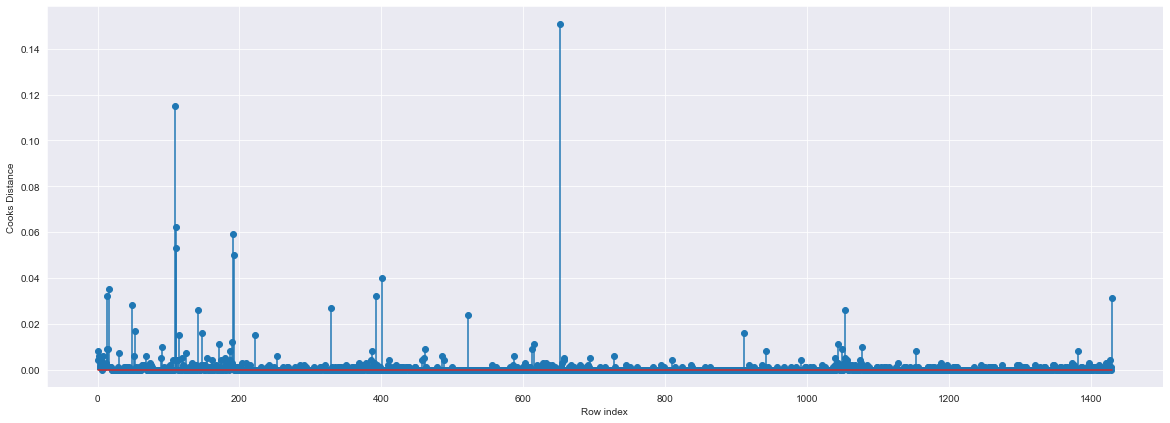

In [47]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
#index and value of influencer where t is more than .5
(np.argmax(t),np.max(t))

(652, 0.15144608026068823)

#### now outlier is 652

In [55]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data4=data3.drop(data3.index[[652]],axis=0).reset_index()

In [69]:
#Drop the original index
data4=data4.drop(['index'],axis=1)
data4.head()

,level_0,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,5,210,1165
1,1,13750,23,72937,90,5,210,1165
2,2,13950,24,41711,90,5,210,1165
3,3,14950,26,48000,90,5,210,1165
4,4,13750,30,38500,90,5,210,1170


#### Build New Model after 2nd Implementation of Cooks Distance

In [56]:
#Build the model --4th Model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=data4).fit()

In [57]:
#4th Model R_square.
Fourth_model_R2 = (model.rsquared,model.rsquared_adj)
Fourth_model_R2

(0.8798382524734587, 0.8793315971781956)

In [58]:
#Checking R2 of 3rd and 4th Model to find out which model is better, or R2 is same
if Third_model_R2[0]<Fourth_model_R2[0]:
    print("4th Model is Better as its R2",Fourth_model_R2[0],"is more then",Third_model_R2[0])
else:
    print("3rd Model is Better as its R2",Third_model_R2[0],"is more then",Fourth_model_R2[0])

4th Model is Better as its R2 0.8798382524734587 is more then 0.8778896214222306


#### 3rd Implementation of Cook Distance

In [59]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
t = model_influence.cooks_distance[0]

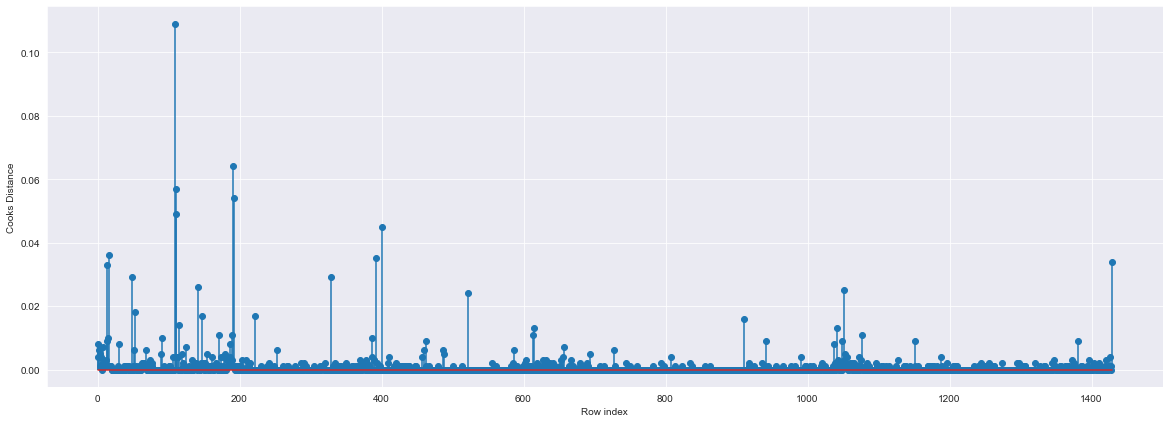

In [61]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data4)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
#index and value of influencer where t is more than .5
(np.argmax(t),np.max(t))

(109, 0.10931448988722475)

##### Now outlier is 109 index, but Since the value is <1 , we can stop the diagnostic process and finalize the model, but Just to Confirm We will Create another model and Check R_Squared

In [70]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data5=data4.drop(data4.index[[109]],axis=0).reset_index()

In [71]:
#Drop the original index
data5=data5.drop(['index'],axis=1)
data5.head()

,level_0,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,5,210,1165
1,1,13750,23,72937,90,5,210,1165
2,2,13950,24,41711,90,5,210,1165
3,3,14950,26,48000,90,5,210,1165
4,4,13750,30,38500,90,5,210,1170


#### Build New Model after 3rd Implementation of Cooks Distance

In [73]:
#Build the model --5th Model -- check model
import statsmodels.formula.api as smf 
check_model = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=data5).fit()

In [74]:
#5th Model R_square.
Fifth_model_R2 = (check_model.rsquared,check_model.rsquared_adj)
Fifth_model_R2

(0.8777991974853101, 0.8772835822848262)

In [75]:
#Checking R2 of 4th and 5th Model to find out which model is better, or R2 is same
if Fourth_model_R2[0]<Fifth_model_R2[0]:
    print("5th Model is Better as its R2",Fifth_model_R2[0],"is more then",Fourth_model_R2[0])
else:
    print("4th Model is Better as its R2",Fourth_model_R2[0],"is more then",Fifth_model_R2[0])

4th Model is Better as its R2 0.8798382524734587 is more then 0.8777991974853101


#### predicting for new data

In [76]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':35,"KM":60000,"HP":100,"Gears":5,"Quarterly_Tax":150,"Weight":1111},index=[1])
new_data

,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
1,35,60000,100,5,150,1111


In [77]:
#Predicting
model.predict(new_data)

1    14052.578674
dtype: float64

In [78]:
#Coefficients
model.params

Intercept       -13426.470046
Age_08_04         -113.182735
KM                  -0.021993
HP                  23.225875
Gears              532.210031
Quarterly_Tax       -3.152102
Weight              25.426818
dtype: float64